5. With data aggregation and data visualization answer the following questions:
    
    A. What is the change in pct of divorced danes from 2008 to 2020?
    
    B. Which of the 5 biggest cities has the highest percentage of 'Never Married'?
    
    C. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
    
    D. Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)


In [2]:
import pandas as pd 
import numpy as np

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2008K4%2C2020K1'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
data = np.array(df)

d1 = data[(data[:,1] == '2008')][0][2]
d2 = data[(data[:,1] == '2020')][0][2]
print(data)
# Vi ser på 2008K4 da det er udgangen af 2008
print('Change in pct of divorced danes from 2008 to 2020: {}%'.format((d2-d1)/d1 * 100))

[['Fraskilt' '2008' 432156]
 ['Fraskilt' '2020' 544588]]
Change in pct of divorced danes from 2008 to 2020: 26.016531067484888%


In [5]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CTOT&Tid=2020K1&OMR%C3%85DE=101%2C147%2C155%2C185%2C165%2C151%2C153%2C157%2C159%2C161%2C163%2C167%2C169%2C183%2C173%2C175%2C187%2C201%2C240%2C210%2C250%2C270%2C260%2C217%2C219%2C223%2C230%2C400%2C411%2C253%2C259%2C350%2C265%2C269%2C320%2C376%2C316%2C326%2C360%2C370%2C306%2C329%2C330%2C340%2C336%2C390%2C420%2C430%2C440%2C482%2C410%2C480%2C450%2C461%2C479%2C492%2C530%2C561%2C563%2C607%2C510%2C621%2C540%2C550%2C573%2C575%2C630%2C580%2C710%2C766%2C615%2C707%2C727%2C730%2C741%2C740%2C746%2C706%2C751%2C657%2C661%2C756%2C665%2C760%2C779%2C671%2C791%2C810%2C813%2C860%2C849%2C825%2C846%2C773%2C840%2C787%2C820%2C851'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df = pd.DataFrame(df)
df = df.sort_values(by=['CIVILSTAND', 'INDHOLD'], ascending=False)

data = np.array(df)
bigCity = data[(data[:, 0] == 'I alt')][0:5]
NotMarried = np.array(list(filter(lambda x: x[2] in bigCity[:,2], data[data[:, 0] == 'Ugift'])))
result = {x[2]: (x[3]/bigCity[index][3]*100) for index, x in enumerate(NotMarried)}
result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
print('Which of the 5 biggest cities has the highest percentage of Never Married -- {}: {}%'.format(list(result.keys())[0], list(result.values())[0]))
df
bigCity

Which of the 5 biggest cities has the highest percentage of Never Married -- København: 65.23579087199924%


array([['I alt', '2020', 'København', 632340],
       ['I alt', '2020', 'Aarhus', 349983],
       ['I alt', '2020', 'Aalborg', 217075],
       ['I alt', '2020', 'Odense', 204895],
       ['I alt', '2020', 'Vejle', 115748]], dtype=object)

Text(0.5, 1.0, 'Mennesker Gift/Separeret i tiden 2008 til 2020')

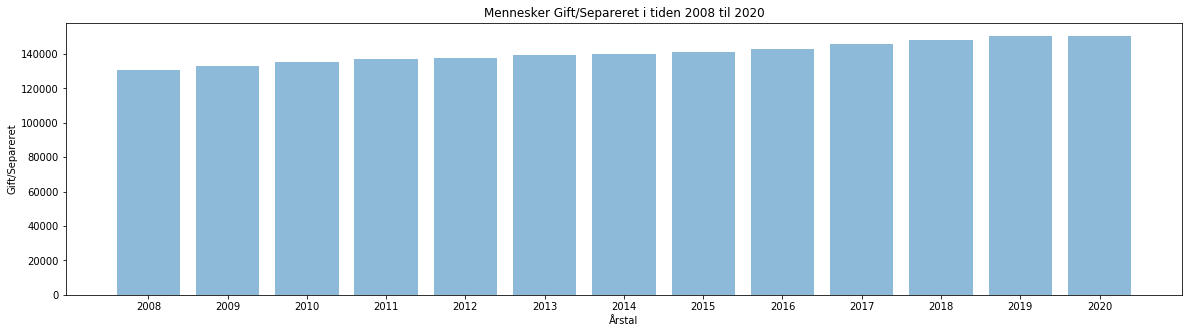

In [3]:
import matplotlib.pyplot as plt

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G&OMR%C3%85DE=101&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K1'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df = pd.DataFrame(df)
data = np.array(df)

marriedSingleYear = {}
for row in data:
    marriedSingleYear[row[2]] = row[3]

plt.figure(figsize=(20, 5))
plt.bar(marriedSingleYear.keys(), marriedSingleYear.values(), align='center', alpha=0.5,)
plt.ylabel('Gift/Separeret')
plt.xlabel('Årstal')
plt.title('Mennesker Gift/Separeret i tiden 2008 til 2020')

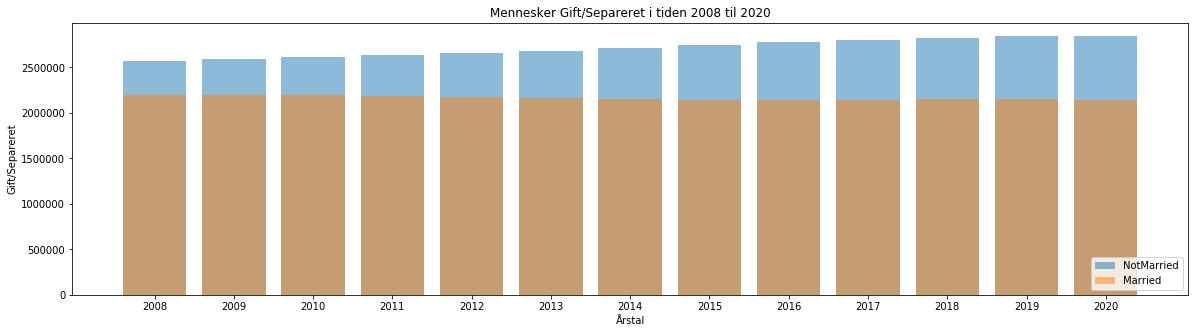

In [12]:
urlMarried = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K1&CIVILSTAND=G'
df = pd.read_csv(urlMarried,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df = pd.DataFrame(df)
dataMarried = np.array(df)

urlNotMarried = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K1'
df = pd.read_csv(urlNotMarried,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df = pd.DataFrame(df)
dataNotMarried = np.array(df)

notMarried = {}
for row in dataNotMarried:
    notMarried[row[1]] = notMarried.get(row[1], 0) + row[2]

married = {}
for row in dataMarried:
    married[row[0]] = married.get(row[0], 0) + row[2]

plt.figure(figsize=(20, 5))
plt.bar(notMarried.keys(), notMarried.values(), align='center', alpha=0.5,)
plt.bar(married.keys(), married.values(), align='center', alpha=0.5,)
plt.ylabel('Gift/Separeret')
plt.xlabel('Årstal')
plt.title('Mennesker Gift/Separeret i tiden 2008 til 2020')
plt.legend(['NotMarried', 'Married'], loc=4)